In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def funcion_ejemplo(X):
    return np.cos(1.5 * np.pi * X)

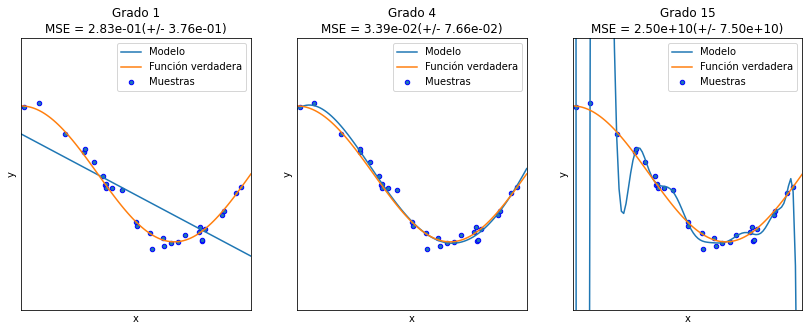

In [2]:
np.random.seed(1234)

n_muestras = 30
grados = [1, 4, 15]

X = np.sort(np.random.rand(n_muestras))
y = funcion_ejemplo(X) + np.random.randn(n_muestras) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(grados)):
    ax = plt.subplot(1, len(grados), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polinomio = PolynomialFeatures(degree=grados[i], include_bias=False)
    regresion_lineal = LinearRegression()
    
    secuencia_mecanismos = Pipeline(
        [
            ("Interpolación Polinomial", polinomio),
            ("Regresión Lineal", regresion_lineal),
        ]
    )
    secuencia_mecanismos.fit(X[:, np.newaxis], y)

    puntajes = cross_val_score(secuencia_mecanismos, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, secuencia_mecanismos.predict(X_test[:, np.newaxis]), label="Modelo")
    plt.plot(X_test, funcion_ejemplo(X_test), label="Función verdadera")
    plt.scatter(X, y, edgecolor="b", s=20, label="Muestras")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))

    plt.legend(loc="best")
    plt.title("Grado {}\nMSE = {:.2e}(+/- {:.2e})".format(grados[i], -puntajes.mean(), puntajes.std()))
plt.show()